In [1]:
%load_ext autoreload
%autoreload 2
from qtutils.simulations.schr_solver.schr_solver import *
from qtutils.analysis.std_imports import *

C:\Users\atosato\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [6]:
length = scipy.constants.physical_constants['atomic unit of length'][0] *1e9 # nm 
energy = scipy.constants.physical_constants['Hartree energy in eV'][0] *1e3 # meV
eps0 = 1 / (4 * np.pi)
# mstar = 1*0.09 
mstar = 1 * 0.2 # !!!!! in z-direction calculated from lattinger params

hbar = 1

# Ge/SiGe/Ge heterostructure 8/3/16 nm

In [7]:
# Heterostructure definition 
steps = 1000

eps_SiGe = calc_eps_r_SiGe(0.8) * eps0
eps_Si = calc_eps_r_SiGe(0) * eps0
eps_Ge = calc_eps_r_SiGe(1) * eps0

bandoffst_barrier = 163 #meV

heterostructure = [
#   (length, height, eps*) for each layer
    (55/length, bandoffst_barrier/energy, eps_SiGe), 
    (8/length, 0, eps_Ge),
    (3/length, bandoffst_barrier/energy, eps_SiGe),
    (16/length, 0, eps_Ge),
    (20/length, bandoffst_barrier/energy, eps_SiGe),
]

## Calculate the coupling from delta_SAS

converged in 3 iterations with precision 1.00
Vg min = 8.40e+01 mV
delta_sas = 5.05e-01 meV
tc = 2.53e-01 meV
f = 6.11e+10 Hz


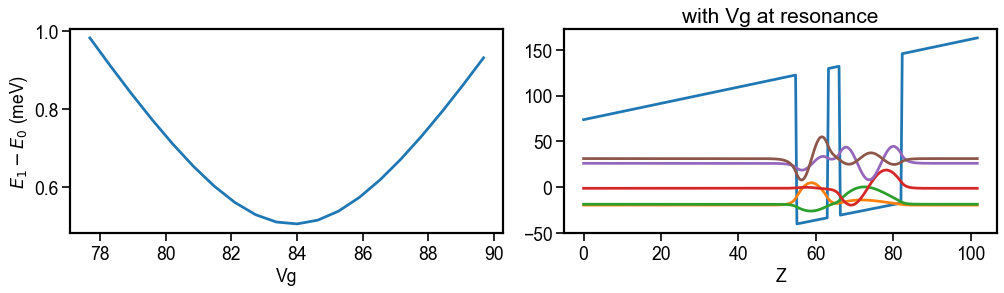

In [8]:
steps = 300
Vg_bounds = np.array([0,300])
ds = get_coupling(Vg_bounds, heterostructure, mstar, steps)

## Solve the system for different gate voltages

In [16]:
Vg_arr = np.linspace(70,90,100)/energy
ds = solve_sys(Vg_arr, heterostructure, mstar=mstar, steps=300)

# transform in normal units
ds['Z'] = ds.Z*length
ds['Vg'] = ds.Vg*energy
ds['E_self'] = ds.E_self * energy
ds['U_band'] = ds.U_band * energy
ds['psi'] = ds.psi*100 # to fit with band offset in plot
ds

<xarray.Dataset>
Dimensions:     (E_level: 300, Vg: 100, Z: 300)
Coordinates:
  * Z           (Z) float64 0.0 0.34 0.68 1.02 1.36 ... 100.6 101.0 101.3 101.7
  * E_level     (E_level) int32 0 1 2 3 4 5 6 7 ... 293 294 295 296 297 298 299
  * Vg          (Vg) float64 70.0 70.2 70.4 70.61 70.81 ... 89.39 89.6 89.8 90.0
Data variables:
    psi         (Vg, E_level, Z) float64 2.175e-20 4.491e-20 ... 2.874 -1.443
    psi_sq      (Vg, E_level, Z) float64 4.731e-44 2.017e-43 ... 0.0002081
    E_self      (Vg, E_level) float64 -13.47 -11.52 ... 6.728e+03 6.742e+03
    U_band      (Vg, Z) float64 93.24 93.47 93.71 93.95 ... 162.4 162.7 163.0
    sigma_gate  (Vg) float64 1.647e-06 1.651e-06 ... 2.112e-06 2.117e-06
    E_field     (Vg, Z) float64 -1.352e-06 -1.352e-06 ... -1.739e-06 -1.739e-06

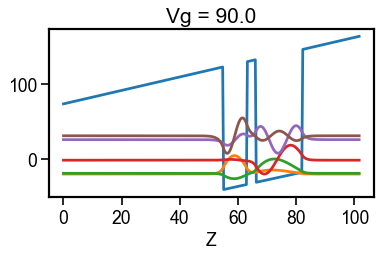

In [19]:
dss = ds.sel(Vg=90, method='nearest').sel(E_level=slice(0,4))

dss.U_band.plot()
(dss.psi+dss.E_self).plot(hue='E_level', add_legend=0)
to_clipboard()

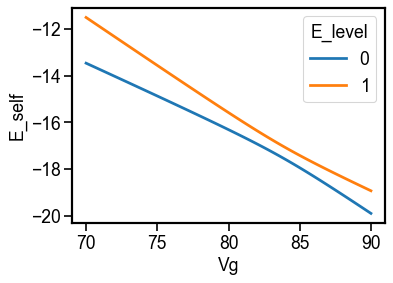

In [20]:
ds.sel(E_level=slice(0,1)).E_self.plot(hue='E_level')
plt.show()